# Read the dataset

In [2]:
import pandas as pd

df = pd.read_csv('results.csv', skip_blank_lines = True)
print(df)

             date  home_team  away_team  home_score  away_score  \
0      1872-11-30   Scotland    England           0           0   
1      1873-03-08    England   Scotland           4           2   
2      1874-03-07   Scotland    England           2           1   
3      1875-03-06    England   Scotland           2           2   
4      1876-03-04   Scotland    England           3           0   
...           ...        ...        ...         ...         ...   
42645  2021-09-09   Colombia      Chile           3           1   
42646  2021-09-09   Paraguay  Venezuela           2           1   
42647  2021-09-09    Uruguay    Ecuador           1           0   
42648  2021-09-09  Argentina    Bolivia           3           0   
42649  2021-09-09     Brazil       Peru           2           0   

                         tournament          city    country  neutral  
0                          Friendly       Glasgow   Scotland    False  
1                          Friendly        London  

# Exploring the dataset

In [8]:
# number of rows
print(len(df))

#number of tournaments
tournaments = len(df.tournament.unique())
print(tournaments)

42650
120


# Convert and Deduce

In [10]:
df['date'] = pd.to_datetime(df['date'])
print(len(df[df.date.dt.year == 2018]))

908


# Team Statistics

In [29]:
import numpy as np

df['result'] = np.where(df['home_score'] > df['away_score'], 'home_win', 
                        np.where(df['home_score'] < df ['away_score'], 'home_loss', 'draw'))
df.groupby(['result']).size()

score_freq = df.groupby(['result']).size().reset_index(name='counts')
print(score_freq)
type(score_freq)

      result  counts
0       draw    9837
1  home_loss   12074
2   home_win   20739


pandas.core.frame.DataFrame

# Visualization

([<matplotlib.patches.Wedge at 0x1a4b11a3020>,
 [Text(0.8236469557819166, 0.7291129488845893, 'draw'),
  Text(-0.7639752481092681, 0.7914176016973483, 'home_loss'),
  Text(0.047466475106033794, -1.0989754017906899, 'home_win')])

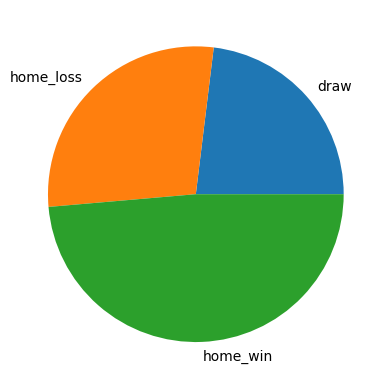

In [30]:
import matplotlib.pyplot as plt

labels = score_freq.result.values
sizes = score_freq.counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

   neutral  counts
0    False   32076
1     True   10574


([<matplotlib.patches.Wedge at 0x1a4b5dab020>,
 [Text(-0.7828713770530386, 0.7727304879394103, 'False'),
  Text(0.7828713408789129, -0.7727305245882636, 'True')])

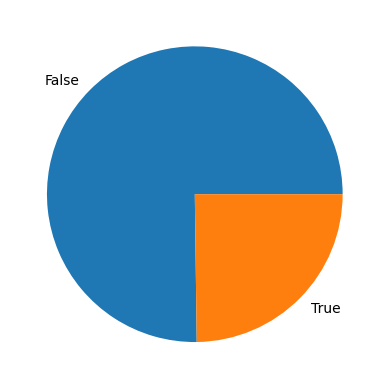

In [37]:
neutral_tf = df.groupby(['neutral']).size().reset_index(name = 'counts')
print(neutral_tf)

labels = neutral_tf.neutral.values
sizes = neutral_tf.counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

# Unique Teams

In [42]:
teams = pd.concat([df['home_team'], df['away_team']])
print(len(teams.unique()))

313
